## Face Expression Prediction
dataset : https://www.kaggle.com/datasets/msambare/fer2013

### Load model & data

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
import os

from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array

### constanta & variable

In [2]:
IMAGE_SIZE = 224
BATCH_SIZE = 32
CHANNELS   = 3
IMG_SHAPE = (224, 224)
INPUT_SHAPE = [IMAGE_SIZE, IMAGE_SIZE, CHANNELS]
TRAIN_PATH  = "ds_new/train"
TEST_PATH = "ds_new/test"

## Load data into dataframe 

In [3]:
import numpy as np
import os
import cv2
import pandas as pd

def load_images_into_dataframe(directory_path, class_labels):
    data = []
    for label in class_labels:
        label_directory = os.path.join(directory_path, label)
        for filename in os.listdir(label_directory):
            if filename.endswith('.jpg'):  # Sesuaikan dengan ekstensi citra Anda
                image_path = os.path.join(label_directory, filename)
                img = cv2.imread(image_path)
                img = cv2.resize(img, (IMAGE_SIZE, IMAGE_SIZE))  # Sesuaikan ukuran citra jika perlu
                img_data = np.array(img)  # Konversi gambar ke array NumPy
                data.append({'image_data': img_data, 'class': label})
    df = pd.DataFrame(data)
    return df

In [4]:
class_labels = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
df = load_images_into_dataframe(TRAIN_PATH, class_labels)


In [5]:
df_test = load_images_into_dataframe(TEST_PATH, class_labels)

In [6]:
df

,image_data,class
0,"[[[254, 254, 254], [254, 254, 254], [254, 254,...",angry
1,"[[[216, 216, 216], [216, 216, 216], [216, 216,...",angry
2,"[[[0, 0, 0], [0, 0, 0], [0, 0, 0], [0, 0, 0], ...",angry
3,"[[[9, 9, 9], [9, 9, 9], [9, 9, 9], [10, 10, 10...",angry
4,"[[[14, 14, 14], [14, 14, 14], [14, 14, 14], [1...",angry
...,...,...
3145,"[[[33, 33, 33], [33, 33, 33], [33, 33, 33], [3...",surprise
3146,"[[[166, 166, 166], [166, 166, 166], [166, 166,...",surprise
3147,"[[[230, 230, 230], [230, 230, 230], [230, 230,...",surprise
3148,"[[[101, 101, 101], [101, 101, 101], [101, 101,...",surprise


In [7]:
df_test

,image_data,class
0,"[[[17, 17, 17], [17, 17, 17], [17, 17, 17], [1...",angry
1,"[[[175, 175, 175], [175, 175, 175], [175, 175,...",angry
2,"[[[168, 168, 168], [168, 168, 168], [169, 169,...",angry
3,"[[[117, 117, 117], [117, 117, 117], [118, 118,...",angry
4,"[[[23, 23, 23], [23, 23, 23], [24, 24, 24], [3...",angry
...,...,...
345,"[[[242, 242, 242], [242, 242, 242], [237, 237,...",surprise
346,"[[[80, 80, 80], [80, 80, 80], [80, 80, 80], [8...",surprise
347,"[[[228, 228, 228], [228, 228, 228], [228, 228,...",surprise
348,"[[[246, 246, 246], [246, 246, 246], [244, 244,...",surprise


In [8]:
trainds = tf.keras.preprocessing.image_dataset_from_directory(
            directory=TRAIN_PATH,
            shuffle=True,
            image_size=(IMAGE_SIZE,IMAGE_SIZE),
            batch_size = BATCH_SIZE,
)

Found 3150 files belonging to 7 classes.


In [9]:
cls_nms = trainds.class_names
cls_nms

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [10]:
n_class = len(cls_nms)

In [11]:
list_trainset = []

for i in range(7):
    cls = cls_nms[i]
    path = os.path.join(TRAIN_PATH, cls)
    jumlah_data = len(os.listdir(path))
    list_trainset.append(jumlah_data)

list_trainset

[450, 450, 450, 450, 450, 450, 450]

In [12]:
list_testset = []

for i in range(7):
    cls = cls_nms[i]
    path = os.path.join(TEST_PATH, cls)
    jumlah_data = len(os.listdir(path))
    list_testset.append(jumlah_data)

list_testset

[50, 50, 50, 50, 50, 50, 50]

In [13]:
for image_batch, label_batch in trainds.take(1):
    print(image_batch.shape)
    print(label_batch.numpy())

(32, 224, 224, 3)
[0 0 6 5 0 2 6 2 4 6 1 5 4 3 0 6 1 4 1 1 6 3 1 2 2 4 0 5 0 0 3 0]


### Visualization Image

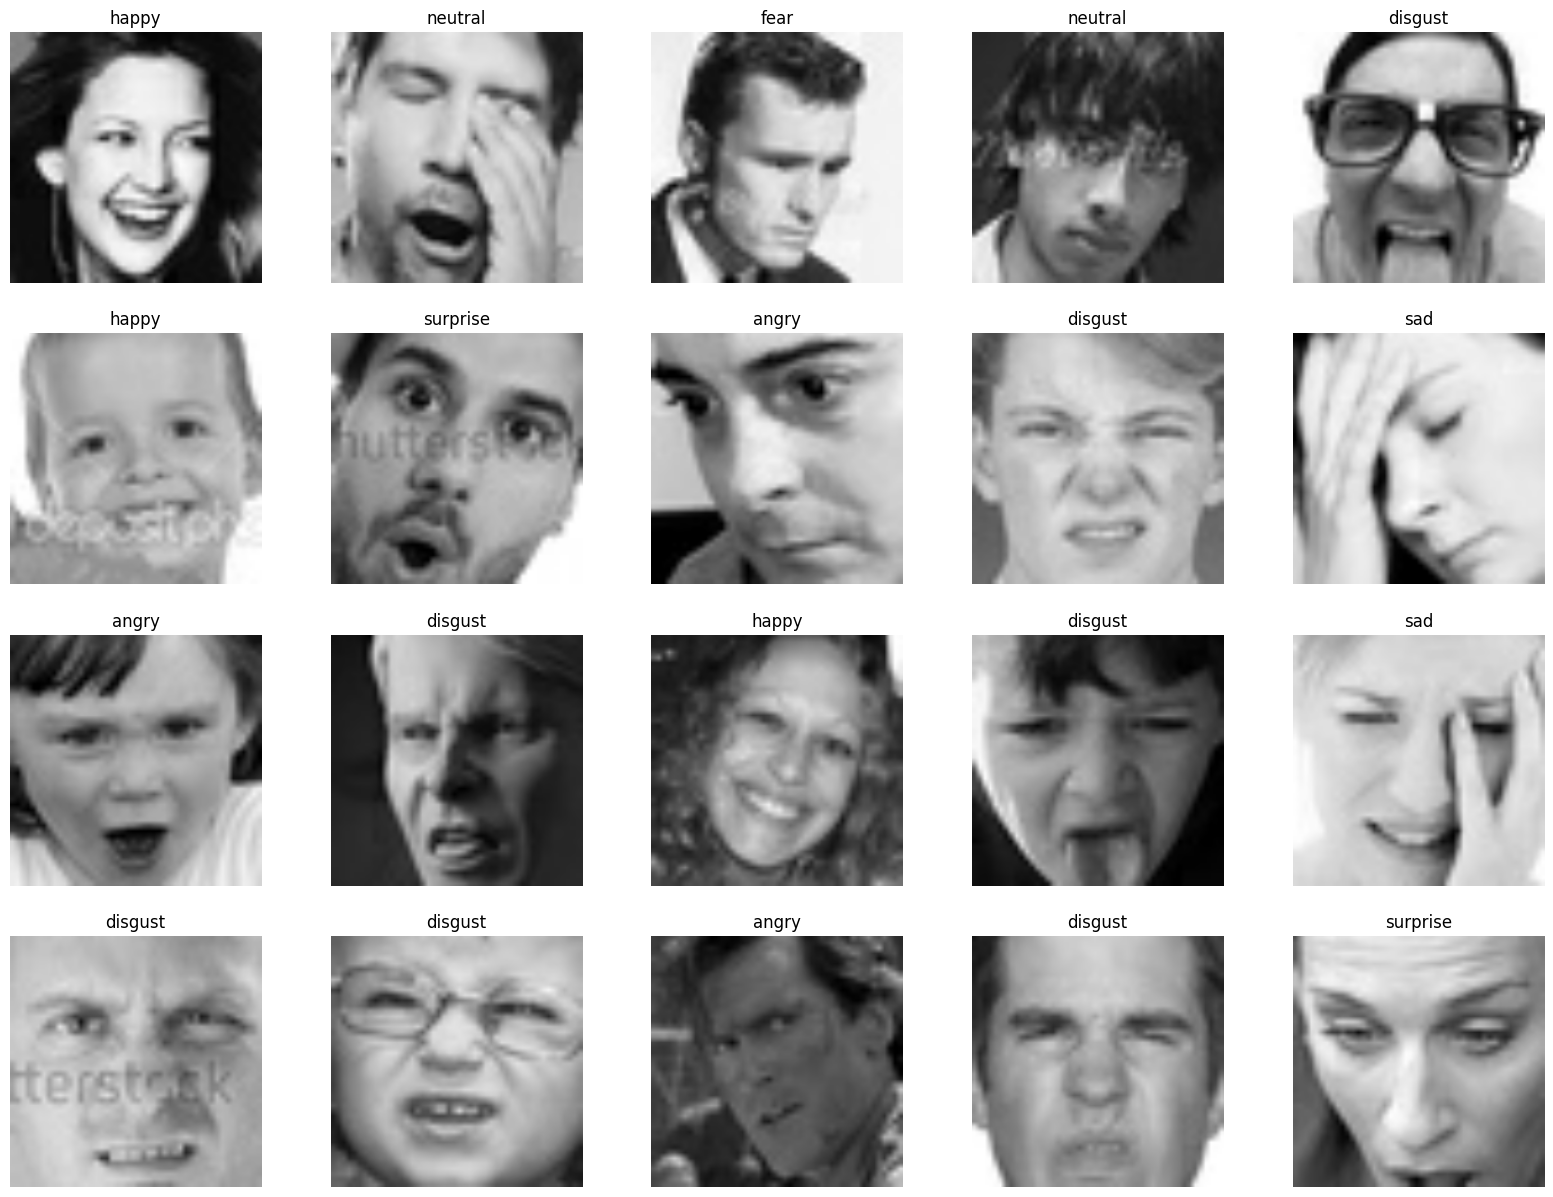

In [14]:
plt.figure(figsize=(20,15))
for image_batch, label_batch in trainds.take(1):
    for i in range(20):
        ax = plt.subplot(4,5,i+1)
        plt.imshow(image_batch[i].numpy().astype('uint8'))
        plt.title(cls_nms[label_batch[i]])
        plt.axis("off")

## preprocessing data

In [15]:
img_data_gen = ImageDataGenerator(rescale=1./255,rotation_range=0.2, 
                                  horizontal_flip=True, vertical_flip=True,
                                  shear_range=0.2, validation_split=0.223)

dataset_gen = img_data_gen.flow_from_directory("ds_new", batch_size=BATCH_SIZE,
                                                  class_mode='binary', shuffle=True) 

Found 3500 images belonging to 2 classes.


### Split training & validation 

In [16]:
train_ds = img_data_gen.flow_from_directory(TRAIN_PATH, target_size=IMG_SHAPE, 
                                            batch_size=BATCH_SIZE, subset='training', 
                                                  class_mode='categorical', shuffle=True) 

valid_ds = img_data_gen.flow_from_directory(TRAIN_PATH, target_size=IMG_SHAPE, 
                                            batch_size=BATCH_SIZE, subset='validation', 
                                                  class_mode='categorical', shuffle=True)

test_ds = img_data_gen.flow_from_directory(TEST_PATH, target_size=IMG_SHAPE, 
                                           batch_size=BATCH_SIZE,
                                            class_mode='binary', shuffle=True)

Found 2450 images belonging to 7 classes.
Found 700 images belonging to 7 classes.
Found 350 images belonging to 7 classes.


## Model building

In [17]:
def model_building(model_name, INPUT_SHAPE=INPUT_SHAPE):
    print('Model Initialization started')
    base_model = model_name(include_top=False, weights='imagenet', input_shape=INPUT_SHAPE)
    
    for layers in base_model.layers:
        layers.trainable = False
    print('Model Initialization finished')
    
    #model creation
    print('Model creation started')
    inp_model = base_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(inp_model)
    x = Flatten()(x)
    x = Dense(1024, activation="relu")(x)
    x = Dense(512, activation="relu")(x)
    x = Dense(n_class, activation = 'softmax')(x)
    
    model = Model(inputs = base_model.input, outputs = x)
    #model summary
    print('Model summary')
    #model.summary()

    return model


In [18]:
from tensorflow.keras.applications.vgg19 import VGG19

In [19]:
model = model_building(VGG19)

Model Initialization started
Model Initialization finished
Model creation started
Model summary


In [20]:
#model compilation
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.0001, momentum=0.9), 
              loss='categorical_crossentropy', metrics=['accuracy'])  

In [25]:
EPOCHS=10

In [23]:
#model training
history = model.fit(train_ds, validation_data=valid_ds, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS,
                    verbose=1)
print('Model Building Finished')

Epoch 1/20
77/77 [==============================] - 1459s 19s/step - loss: 1.9723 - accuracy: 0.1518 - val_loss: 1.9456 - val_accuracy: 0.1371
Epoch 2/20
77/77 [==============================] - 1498s 20s/step - loss: 1.9448 - accuracy: 0.1555 - val_loss: 1.9433 - val_accuracy: 0.1614
Epoch 3/20
77/77 [==============================] - 1485s 19s/step - loss: 1.9426 - accuracy: 0.1706 - val_loss: 1.9406 - val_accuracy: 0.1671
Epoch 4/20
77/77 [==============================] - 1484s 19s/step - loss: 1.9421 - accuracy: 0.1531 - val_loss: 1.9396 - val_accuracy: 0.1686
Epoch 5/20
77/77 [==============================] - 1525s 20s/step - loss: 1.9399 - accuracy: 0.1718 - val_loss: 1.9378 - val_accuracy: 0.2329
Epoch 6/20
77/77 [==============================] - 1534s 20s/step - loss: 1.9375 - accuracy: 0.1931 - val_loss: 1.9354 - val_accuracy: 0.2129
Epoch 7/20
77/77 [==============================] - 1492s 19s/step - loss: 1.9374 - accuracy: 0.1869 - val_loss: 1.9339 - val_accuracy: 0.2143

In [24]:
#model training
history = model.fit(train_ds, validation_data=valid_ds, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS,
                    verbose=2)
print('Model Building Finished')

Epoch 1/20
77/77 - 1559s - loss: 1.9222 - accuracy: 0.2245 - val_loss: 1.9192 - val_accuracy: 0.2386 - 1559s/epoch - 20s/step
Epoch 2/20
77/77 - 1471s - loss: 1.9194 - accuracy: 0.2196 - val_loss: 1.9190 - val_accuracy: 0.2286 - 1471s/epoch - 19s/step
Epoch 3/20
77/77 - 1480s - loss: 1.9198 - accuracy: 0.2282 - val_loss: 1.9186 - val_accuracy: 0.2429 - 1480s/epoch - 19s/step
Epoch 4/20
77/77 - 1463s - loss: 1.9179 - accuracy: 0.2212 - val_loss: 1.9186 - val_accuracy: 0.2157 - 1463s/epoch - 19s/step
Epoch 5/20


KeyboardInterrupt: 

In [ ]:
#model training
history = model.fit(train_ds, validation_data=valid_ds, 
                    batch_size=BATCH_SIZE, 
                    epochs=EPOCHS)
print('Model Building Finished')

Epoch 1/10
77/77 [==============================] - 1448s 19s/step - loss: 1.9194 - accuracy: 0.2253 - val_loss: 1.9181 - val_accuracy: 0.2271
Epoch 2/10
77/77 [==============================] - 1777s 23s/step - loss: 1.9175 - accuracy: 0.2290 - val_loss: 1.9183 - val_accuracy: 0.2300
Epoch 3/10
 6/77 [=>............................] - ETA: 25:20 - loss: 1.9178 - accuracy: 0.2656

In [ ]:
model_version=max([int(i) for i in os.listdir("saved_model") + [0]])+1
model.save(f"saved_model/model{model_version}")
print('model saved')


In [ ]:
model.save("saved_model/model.h5")

In [ ]:
import seaborn as sns

def evaluation_plot(model):
    sns.set_style('whitegrid')
    
    plt.figure(figsize=(10, 8))
    plt.plot(history.history['loss'], label = 'loss')
    plt.plot(history.history['accuracy'], label = 'accuracy')
    plt.plot(history.history['val_loss'], label = 'val_loss')
    plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
    plt.legend()
    plt.title('Model Evaluation')
    plt.show()

In [ ]:
evaluation_plot(history)

In [ ]:
score = model.predict(test_ds)
score

In [ ]:
count=0
for image_batch, label_batch in test_ds:
    print(image_batch[0])
    break

In [ ]:
for image_batch, label_batch in test_ds:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[0])])
    
    plt.axis("off")
    break